In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
       print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving bhppTrainData.csv to bhppTrainData.csv
Saving gecode_test.csv to gecode_test.csv
Saving Geocode.csv to Geocode.csv
User uploaded file "bhppTrainData.csv" with length 989161 bytes
User uploaded file "gecode_test.csv" with length 18188 bytes
User uploaded file "Geocode.csv" with length 64157 bytes


In [0]:
!pip install cmake

In [0]:
!pip install fancyimpute

In [0]:
!pip install geopy

In [0]:
import pandas as pd
pd.options.display.max_rows = 25000

import numpy as np
np.set_printoptions(threshold=np.inf)

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("bhppTrainData.csv")
df.drop(df.loc[:, 'Unnamed: 9':'Unnamed: 13'], axis = 1, inplace = True)

In [0]:
geocode = pd.read_csv("Geocode.csv")

In [8]:
print(df.shape)

(13314, 9)


In [9]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


# Missing Value Imputation & Data Preprocessing

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5497
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [0]:
loc = df['location']
col = df.drop(['location'], axis = 1).columns

In [0]:
df['society'] = df['society'].apply(lambda x: 0 if pd.isnull(x) else 1)
df['society'] = df['society'].apply(lambda x: int(x))


In [0]:
df['size'] = df['size'].fillna('0')
df['size'] = df['size'].apply(lambda x: str(x))
df['size'] = df['size'].apply(lambda x : x[0:2])
df['size'] = df['size'].apply(lambda x : 0 if x == '0' or int(x) > 9 else x)
df['size'] = df['size'].apply(lambda x : int(x))

In [16]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [0]:
df['availability'] = le.fit_transform(df['availability'])

In [0]:
df['area_type'] = le.fit_transform(df['area_type'])

In [0]:
df = pd.DataFrame(df)

In [26]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,40,Electronic City Phase II,2,1,1056.0,2.0,1.0,39.07
1,2,80,Chikka Tirupathi,4,1,2600.0,5.0,3.0,120.00
2,0,80,Uttarahalli,3,0,1440.0,2.0,3.0,62.00
3,3,80,Lingadheeranahalli,3,1,1521.0,3.0,1.0,95.00
4,3,80,Kothanur,2,0,1200.0,2.0,1.0,51.00


In [21]:
from fancyimpute import MICE

Using TensorFlow backend.


In [0]:
m = MICE(verbose=False)

df = m.complete(df.drop(['location'], axis = 1))

In [0]:
df = pd.DataFrame(df)
df.columns = col

In [0]:
df['bath'] = df['bath'].apply(lambda x: round(x))
df['balcony'] = df['balcony'].apply(lambda x: round(x))

In [31]:
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price
0,3.0,40.0,2.0,1.0,1056.0,2,1,39.07
1,2.0,80.0,4.0,1.0,2600.0,5,3,120.00
2,0.0,80.0,3.0,0.0,1440.0,2,3,62.00
3,3.0,80.0,3.0,1.0,1521.0,3,1,95.00
4,3.0,80.0,2.0,0.0,1200.0,2,1,51.00


# Application of Geocoding and Feature Engineering

In [0]:
df = pd.concat([df, loc], axis = 1)

In [0]:
geocode.columns = ['location', 'Lat', 'Long']
geocode['location'] = geocode['location'].apply(lambda x: x.strip())

In [36]:
geocode.head()

,location,Lat,Long
0,"Electronic City Phase II , Bangalore",12.844149,77.679381
1,"Chikka Tirupathi , Bangalore",12.896746,77.866742
2,"Uttarahalli , Bangalore",12.906982,77.552059
3,"Lingadheeranahalli , Bangalore",12.882485,77.536146
4,"Kothanur , Bangalore",13.055196,77.642221


In [0]:
df['location'] = df['location'].apply(lambda x: x+' , Bangalore')

df['location'] = df['location'].apply(lambda x: x.strip())


In [0]:
df.set_index('location', inplace = True)
geocode.set_index('location', inplace = True)

In [0]:
DF = df.join(geocode, lsuffix='_caller', how = 'left')

In [48]:
DF.shape

(14624, 10)

In [0]:
DF = DF.dropna()
DF.drop_duplicates(inplace = True)

In [0]:
DF.reset_index(drop = True, inplace = True)

In [0]:
X = []

for i in range(len(DF[['Lat','Long']])):
  X.append((DF['Lat'][i], DF['Long'][i]))

DF['latlong'] = X

In [0]:
DF.drop(['Lat', 'Long'], axis = 1, inplace = True)

In [53]:
DF.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,latlong
0,2.0,80.0,0.0,0.0,1200.0,6,3,150.0,"(12.963739, 77.671653)"
1,3.0,80.0,0.0,1.0,5000.0,9,3,360.0,"(12.938749000000001, 77.53379699999999)"
2,3.0,80.0,0.0,0.0,6000.0,12,2,150.0,"(12.969089, 77.75085)"
3,2.0,80.0,0.0,0.0,1200.0,11,0,170.0,"(13.011463000000001, 77.675096)"
4,2.0,80.0,4.0,0.0,2360.0,4,1,650.0,"(12.92729, 77.63141800000001)"


In [0]:
import geopy.distance

## proximity from nearest bus station

In [0]:
#Coordinates of major busstation of Bengaluru#
c = [(12.9587681,77.6159946),
(12.9895977,77.5343841),
(12.9345271,77.5435215),
(12.8515788,77.4248895000001),
(13.0279353,77.6321671000001),
(12.9597914,77.5289797),
(12.9293653,77.5569265),
(12.9155691,77.5567733),
(13.0514609,77.5521972),
(12.8554706,77.6648956),
(12.8984834,77.5590645),
(13.163135,77.4806335000001),
(12.9682741,77.6502639),
(12.9869094,77.6479666),
(12.9908141,77.7218375),
(13.0242282,77.6384283),
(13.0262853,77.6029308),
(12.9061395,77.5626733),
(13.0285133,77.5196763),
(13.0285133,77.5196763),
(13.0083456,77.5649297),
(13.0526818,77.4954718),
(12.9467756,77.5519108999999),
(13.0129209,77.5431331),
(13.0051603,77.6123078000001),
(12.9076406,77.5132834),
(12.9719161,77.5298855999999),
(13.0734129,77.5554935),
(12.9843911,77.5489708),
(12.9550291,77.6142102),
(13.0990962,77.5848857999999),
(13.1086263,77.5744794),
(13.1004849,77.5940134),
(12.9715987,77.5945627),
(12.9856503,77.6056927),
(12.9594549,77.5805685)]

k = []

for i in range(len(DF['latlong'])):
  x = []
  for j in c:
    x.append(geopy.distance.vincenty(j, DF['latlong'][i]).km)  
  k.append(min(x))
  
DF['prox_bus'] = k



## Proximity from nearest hospitals

In [0]:
#Coordinates of Multifacility Hospitals in Bengaluru#
c = [(12.9824441,77.6042906),
(12.9809679,77.4380779),
(12.9310011,77.5647469),
(12.971159,77.6369026),
(12.9925096,77.5539762),
(12.9859093,77.6442137),
(12.9263331,77.5928642),
(12.9989946,77.5801699),
(12.9819939,77.6256131)
]

k = []

for i in range(len(DF['latlong'])):
  x = []
  for j in c:
    x.append(geopy.distance.vincenty(j, DF['latlong'][i]).km)  
  k.append(min(x))
  
DF['prox_hosp'] = k

## Proximity from Airport

In [0]:
#Coordinate of Airport#
c = [(13.1986, 77.7066)]

k = []

for i in range(len(DF['latlong'])):
  k.append(geopy.distance.vincenty(DF['latlong'][i], c).km) 
  
DF['prox_airp'] = k

## Proximity from nearest railway stations

In [0]:
#Coordinate of major railway stations in Bengaluru#
c= [(12.961957,77.533582),
(12.915441,77.573571),
(12.992168,77.600393),
(12.978313,77.569702),
(13.001218,77.618629),
(12.975692,77.572837),
(12.975814,77.565708),
(13.043567,77.512464),
(12.952187,77.536939),
(12.976416,77.626674),
(12.996081,77.718958),
(12.978291,77.638594),
(13.032921,77.533297),
(12.929533,77.580159),
(12.907464,77.572879),
(12.899623,77.482698),
(12.961353,77.574571),
(13.000567,77.674646),
(12.998535,77.556952),
(12.946241,77.579991),
(13.008197,77.548829),
(12.946685,77.529912),
(13.048104,77.500104),
(12.950482,77.573695),
(13.028513,77.519676),
(13.032921,77.533297),
(13.000282,77.549747),
(12.938361,77.580066),
(13.270788,76.761645),
(12.938361,77.580066),
(12.996529,77.563224),
(12.985947,77.644932),
(12.97295,77.617007),
(12.970744,77.537492),
(12.896024,77.570227),
(13.025234,77.522002),
(13.028478,77.540891),
(13.023725,77.550724)]

k =[]

for i in range(len(DF['latlong'])):
  x = []
  for j in c:
    x.append(geopy.distance.vincenty(j, DF['latlong'][i]).km)  
  k.append(min(x))
  
DF['prox_rail'] = k

## Proximity from nearest schools

In [0]:
#Coordinate of schools in Bangalore#
c = [(12.964219,77.587395),
(12.9698839,77.5076958),
(12.9694791,77.6031923000001),
(12.995376,77.6088874),
(12.972009,77.6036675),
(12.968451,77.5988629999999),
(12.9700065,77.6016988),
(12.9656919,77.6086757000001),
(12.9622037,77.6060356),
(12.964551,77.600561),
(12.9931895,77.6129871000001),
(12.9688359,77.594906),
(12.9929052,77.6120328),
(13.0027046,77.6158524),
(12.9344333,77.5741157),
(12.9937197,77.6105348),
(12.9625752,77.6071718000001),
(12.986702,77.5872381),
(12.9715987,77.5945627),
(12.9381884,77.5431983999999),
(12.9989963,77.5688153),
(12.9124272,77.649282),
(12.9406589,77.6207459),
(13.1189952,77.5950769),
(12.8198403,77.622123),
(12.9269388,77.5997219999999),
(12.9885636,77.5443422999999),
(12.9286147,77.6060339000001),
(12.9301467,77.7414260000001),
(12.968412,77.631133),
(13.0045904,77.5622461),
(13.0554142,77.5406801),
(13.0347046,77.5788067),
(12.927087,77.637888),
(12.8402211,77.7077062),
(12.9715496,77.704302),
(13.0317956,77.6003249),
(13.3373693,77.6986211000001),
(12.9001716,77.7485187),
(13.0664072,77.6517871999999),
(12.9110276,77.587372),
(12.8352232,77.7783215),
(12.894748,77.745544),
(13.04865,77.6013319),
(12.6391168,77.4438117),
(12.8948979,77.5705553),
(13.01584,77.5758020000001),
(13.0551761,77.5355574),
(13.0092187,77.5687686),
(13.0495867,77.6144257),
(12.9317164,77.5414503),
(13.004632,77.57037),
(13.1017306,77.5837356),
(12.987993,77.5495504),
(12.9233378,77.5234848),
(12.9695643,77.6467946),
(12.98463,77.549454),
(12.9490812,77.6209241),
(12.89968,77.5275541),
(12.9879813,77.5422619999999),
(12.887557,77.751968),
(13.1332246,77.5586513000001),
(12.8879308,77.6968893000001),
(13.0504739,77.5987157),
(12.9259308,77.5683548),
(12.963415,77.5702258),
(12.9711618,77.6041398),
(12.914819,77.5963047),
(12.9123665,77.5272433),
(13.0587019,77.5833835),
(12.8920293,77.5851559),
(12.9711587,77.6281501),
(12.8912197,77.7501073),
(12.8543147,77.5099453),
(12.816739,77.6510020000001),
(12.881496,77.582458),
(12.9958758,77.5778908),
(12.8505391,77.6398773),
(13.0884652,77.5959828),
(12.936313,77.5814849999999),
(12.952033,77.4866286),
(13.0884652,77.5959828),
]

k = []

for i in range(len(DF['latlong'])):
  x = []
  for j in c:
    x.append(geopy.distance.vincenty(j, DF['latlong'][i]).km)  
  k.append(min(x))
  
DF['prox_sch'] = k

## Proximity from nearest 

In [0]:
#Coordinate of Lakes in Bangalore#

c = [(12.8829845,77.5981177),
(12.9354164,77.6678529999999),
(12.9832468,77.6199607999999),
(13.0092983,77.5741212),
(12.9226373,77.6174442),
(12.945098,77.5830757),
(12.8904142,77.5871901),
(13.0465993,77.5855829),
(12.9488681,77.7401652),
(12.9715987,77.5945627),
(12.899404,77.5798522),
(12.8976632,77.5545979),
(12.899404,77.5798522),
(12.967643,77.675566),
(12.975272,77.6883743),
(13.0448805,77.6085027),
(12.9600531,77.7083476),
(12.9230648,77.6464533999999),
(12.9517626,77.5601507),
(12.8904142,77.5871901),
(12.8735659,77.5794724),
(13.0368124,77.6584253999999),
(12.8258046,77.6944103999999)
]

k = []

for i in range(len(DF['latlong'])):
  x = []
  for j in c:
    x.append(geopy.distance.vincenty(j, DF['latlong'][i]).km)  
  k.append(min(x))
  
DF['prox_watbdy'] = k

# Data Standardization

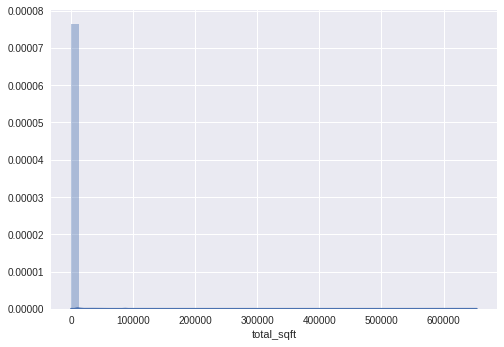

In [65]:
g = sns.distplot(DF['total_sqft'])

In [0]:
from math import log

DF['prox_bus'] = DF['prox_bus'].apply(lambda x: log(x) if x>0 else 0.0)
DF['prox_hosp'] = DF['prox_hosp'].apply(lambda x: log(x) if x>0 else 0.0)
DF['prox_sch'] = DF['prox_sch'].apply(lambda x: log(x) if x>0 else 0.0)
DF['prox_rail'] = DF['prox_rail'].apply(lambda x: log(x) if x>0 else 0.0)
DF['prox_airp'] = DF['prox_airp'].apply(lambda x: log(x) if x>0 else 0.0)


# Checking Correlation

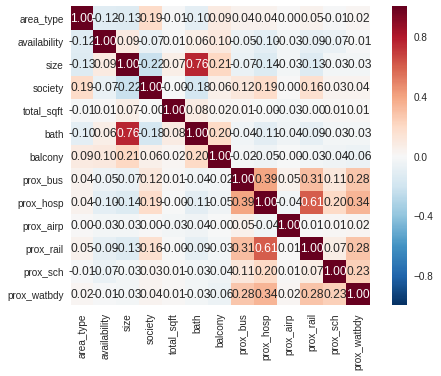

In [68]:
correlation_map = np.corrcoef(DF.drop(['latlong', 'price'], axis = 1).values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=DF.drop(['latlong', 'price'], axis = 1).columns.values, xticklabels=DF.drop(['latlong', 'price'], axis = 1).columns.values)

## Removing Correlation by using PCA

In [0]:
from sklearn.decomposition import PCA

In [0]:
p = PCA(n_components = 6)

In [0]:
df_pca = p.fit_transform(DF[['prox_bus', 'prox_hosp', 'prox_airp', 'prox_rail', 'prox_sch', 'prox_watbdy']])
df_pca = pd.DataFrame(df_pca, columns = ['prox_bus', 'prox_hosp', 'prox_airp', 'prox_rail', 'prox_sch', 'prox_watbdy'])

In [73]:
df_pca.head()

,prox_bus,prox_hosp,prox_airp,prox_rail,prox_sch,prox_watbdy
0,-3.501122,-0.074176,-0.328363,0.059652,0.201146,0.020003
1,-1.126926,2.446558,3.091274,0.981288,-0.356225,-0.084852
2,-1.536614,-0.662089,-0.547812,0.005786,-0.177493,0.018097
3,-0.807846,0.654346,-1.014281,-1.599485,-0.688608,0.082263
4,-2.482735,-0.423254,-0.184752,-0.036470,0.295626,-0.025901


In [0]:
DF.drop(['prox_bus', 'prox_hosp', 'prox_airp', 'prox_rail', 'prox_sch'], axis = 1, inplace = True)
DF.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)

In [0]:
DF = pd.concat([DF, df_pca], axis = 1)

In [76]:
DF.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,latlong,prox_watbdy,prox_bus,prox_hosp,prox_airp,prox_rail,prox_sch,prox_watbdy
0,2.0,80.0,0.0,0.0,1200.0,6,3,150.0,"(12.963739, 77.671653)",0.605630,-3.501122,-0.074176,-0.328363,0.059652,0.201146,0.020003
1,3.0,80.0,0.0,1.0,5000.0,9,3,360.0,"(12.938749000000001, 77.53379699999999)",3.201567,-1.126926,2.446558,3.091274,0.981288,-0.356225,-0.084852
2,3.0,80.0,0.0,0.0,6000.0,12,2,150.0,"(12.969089, 77.75085)",2.519602,-1.536614,-0.662089,-0.547812,0.005786,-0.177493,0.018097
3,2.0,80.0,0.0,0.0,1200.0,11,0,170.0,"(13.011463000000001, 77.675096)",3.336891,-0.807846,0.654346,-1.014281,-1.599485,-0.688608,0.082263
4,2.0,80.0,4.0,0.0,2360.0,4,1,650.0,"(12.92729, 77.63141800000001)",1.601377,-2.482735,-0.423254,-0.184752,-0.036470,0.295626,-0.025901


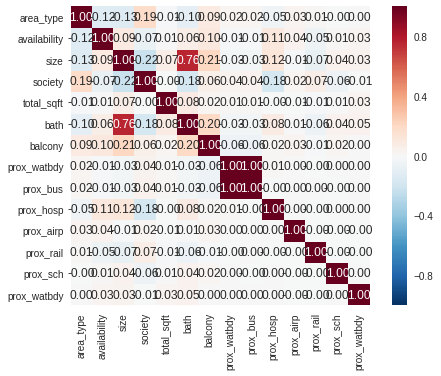

In [77]:
correlation_map = np.corrcoef(DF.drop(['latlong', 'price'], axis = 1).values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=DF.drop(['latlong', 'price'], axis = 1).columns.values, xticklabels=DF.drop(['latlong', 'price'], axis = 1).columns.values)

# Outlier Analysis for Training Data

In [54]:
DF.drop(['latlong', 'price'], axis = 1).head()

,area_type,availability,size,society,total_sqft,bath,balcony,prox_bus,prox_hosp,prox_airp,prox_rail,prox_sch
0,2.0,12.0,0.0,0.0,1200.0,6,3,2.374321,3.857275,26.257905,3.800145,2.773042
1,3.0,12.0,0.0,1.0,5000.0,9,3,1.153974,3.466121,34.317061,0.973923,1.022043
2,3.0,12.0,0.0,0.0,6000.0,12,2,3.960353,11.718147,25.840581,4.570432,4.427881
3,2.0,12.0,0.0,0.0,1200.0,11,0,4.005091,4.383649,20.983192,1.206418,5.434825
4,2.0,12.0,4.0,0.0,2360.0,4,1,3.592201,4.185061,31.103162,5.287858,0.702459


In [0]:
from sklearn.covariance import MinCovDet

COV = MinCovDet()
COV.fit(DF.drop(['latlong', 'price'], axis = 1))

c = COV.covariance_

In [0]:
from scipy.spatial.distance import mahalanobis

maha = []

for i in range(DF.shape[0]):
  maha.append(mahalanobis(DF.drop(['latlong', 'price'], axis = 1).loc[i, :], np.mean(DF.drop(['latlong', 'price'], axis = 1)), np.linalg.inv(c)))

In [0]:
outlier_indices = []

for i in range(len(maha)):
  if maha[i] > (((np.percentile(maha, 75) - np.percentile(maha, 25)) ) + (np.percentile(maha, 75))):
    outlier_indices.append(i)
                                                                              

In [0]:
DF = DF.drop(index = outlier_indices)

In [87]:
DF.shape

(12743, 16)

In [0]:
DF = pd.concat([DF, loc], axis = 1)

In [0]:
DF['location'] = le.fit_transform(DF['location'])

In [93]:
DF.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,latlong,prox_watbdy,prox_bus,prox_hosp,prox_airp,prox_rail,prox_sch,prox_watbdy,location
0,2.0,80.0,0.0,0.0,1200.0,6.0,3.0,150.0,"(12.963739, 77.671653)",0.605630,-3.501122,-0.074176,-0.328363,0.059652,0.201146,0.020003,416
1,3.0,80.0,0.0,1.0,5000.0,9.0,3.0,360.0,"(12.938749000000001, 77.53379699999999)",3.201567,-1.126926,2.446558,3.091274,0.981288,-0.356225,-0.084852,314
2,3.0,80.0,0.0,0.0,6000.0,12.0,2.0,150.0,"(12.969089, 77.75085)",2.519602,-1.536614,-0.662089,-0.547812,0.005786,-0.177493,0.018097,1177
3,2.0,80.0,0.0,0.0,1200.0,11.0,0.0,170.0,"(13.011463000000001, 77.675096)",3.336891,-0.807846,0.654346,-1.014281,-1.599485,-0.688608,0.082263,755
4,2.0,80.0,4.0,0.0,2360.0,4.0,1.0,650.0,"(12.92729, 77.63141800000001)",1.601377,-2.482735,-0.423254,-0.184752,-0.036470,0.295626,-0.025901,714


# Training a Linear Regression Model

In [0]:
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [0]:
X['area_type'] = X['area_type'].apply(lambda x: int(x))
X['availability'] = X['availability'].apply(lambda x: int(x))
X['size'] = X['size'].apply(lambda x: int(x))
X['society'] = X['society'].apply(lambda x: int(x))
X['location'] = X['location'].apply(lambda x: int(x))

In [0]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 105)

In [0]:
regr = LinearRegression()
regr_robust = RANSACRegressor()

In [123]:
regr.fit(x_train, y_train)
regr_robust.fit(x_train, y_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [0]:
predictions_regr = regr.predict(x_test)
predictions_robust = regr_robust.predict(x_test)

In [125]:
print('RMSE for Linear Regression '+ str((mean_squared_error(y_test, predictions_regr))**0.5))
print('RMSE for RANSAC Regression '+ str((mean_squared_error(y_test, predictions_robust))**0.5))

RMSE for Linear Regression 131.06485545826482
RMSE for RANSAC Regression 196.44387434805094


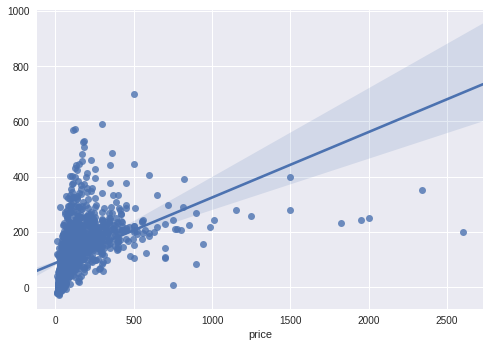

In [126]:
sns.regplot(y_test, predictions_regr)

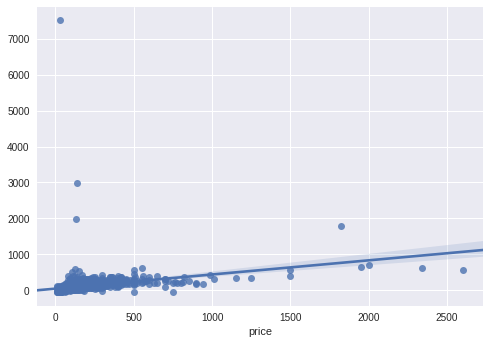

In [127]:
sns.regplot(y_test, predictions_robust)

In [129]:
r2 = r2_score(predictions_regr, y_test)

adj_r2 = 1 - ((1 - r2) * ((x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1)))

print(r2)
print(adj_r2)

-2.0881120414412053
-2.0926631989005897


# Training a RandomForest and CrossValidation

In [0]:
Y = DF['price']

X = DF.drop(['price', 'latlong'], axis = 1)

In [0]:
X['area_type'] = X['area_type'].apply(lambda x: int(x))
X['availability'] = X['availability'].apply(lambda x: int(x))
X['size'] = X['size'].apply(lambda x: int(x))
X['society'] = X['society'].apply(lambda x: int(x))
X['location'] = X['location'].apply(lambda x: int(x))

In [0]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [0]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 105)

In [109]:
x_train.shape

(10194, 15)

In [0]:
regr = RandomForestRegressor(n_estimators = 80, 
                             max_depth=15,
                             max_features = 0.5,
                             random_state= 0, 
                             oob_score = True)

In [110]:
regr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [111]:
print(1 - regr.oob_score_)

0.338421253681483


In [0]:
predictions = regr.predict(x_test)

In [113]:
(mean_squared_error(y_test, predictions))**0.5

73.4672406290136

In [114]:
r2 = r2_score(predictions, y_test)

adj_r2 = 1 - ((1 - r2) * ((x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1)))

print(r2)
print(adj_r2)

0.6429983289842224
0.6424721917209844


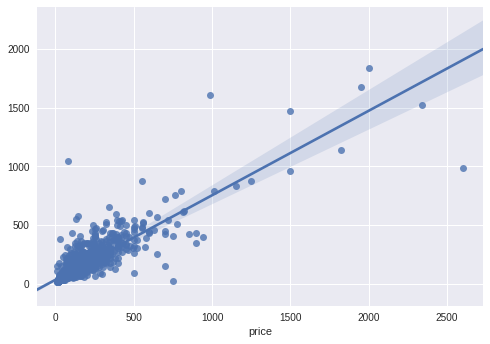

In [115]:
sns.regplot(y_test, predictions)

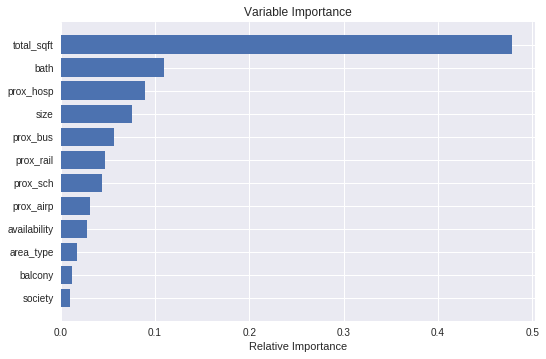

In [332]:
importances = regr.feature_importances_
sorted_idx = np.argsort(importances)
features = DF.drop(['latlong', 'price'], axis = 1).columns
features = np.array(features)

padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
fig = plt.gcf()
fig.set_size_inches(8.5, 5.5)
plt.show()

# Training a XGBoost and Cross Validation

In [0]:
import xgboost as xgb

In [0]:
x_train.columns = range(len(x_train.columns))
x_test.columns = range(len(x_test.columns))

In [0]:
xgdmat=xgb.DMatrix(x_train,y_train)

our_params={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}

final_gb=xgb.train(our_params,xgdmat)

tesdmat=xgb.DMatrix(x_test)

y_pred=final_gb.predict(tesdmat)

In [137]:
print(mean_squared_error(y_pred, y_test)**0.5)

115.70078997421537


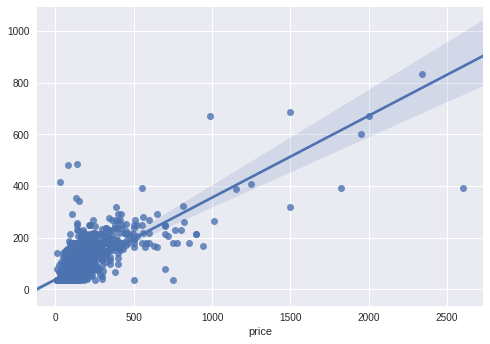

In [138]:
sns.regplot(y_test, y_pred)